# Tumor Detection Project

This notebook performs a complete ML workflow for tumor detection using a CSV dataset. It includes:

- Data loading and cleaning (remove `id`, `Unnamed` columns)
- Exploratory Data Analysis (count plots, heatmap correlations)
- Preprocessing (StandardScaler)
- Train/test split and Random Forest model training
- Evaluation (accuracy, classification report, confusion matrix)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Jupyter display settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [9]:
# Load dataset (update path if needed)

df = pd.read_csv('Tumor_detection.csv')  # replace with your file path
try:
    df = pd.read_csv(csv_path)
    print(f'Loaded dataset with shape: {df.shape}')
    display(df.head())
except Exception as e:
    print('Could not load dataset. Please place your CSV at', csv_path)
    print('Error:', e)

Could not load dataset. Please place your CSV at            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54          

In [10]:
# Data cleaning: drop id-like and unnamed columns, check missing values

df_clean = df.copy()
cols_to_drop = [c for c in df_clean.columns if c.lower().strip() in ('id',) or 'unnamed' in c.lower()]
if cols_to_drop:
    print('Dropping columns:', cols_to_drop)
    df_clean.drop(columns=cols_to_drop, inplace=True)
else:
    print('No id/unnamed columns found to drop.')

# Inspect missing values
missing = df_clean.isnull().sum()
print('\nMissing values per column:\n', missing[missing>0])

df_clean.shape

Dropping columns: ['id']

Missing values per column:
 Series([], dtype: int64)


(569, 31)

diagnosis
B    357
M    212
Name: count, dtype: int64


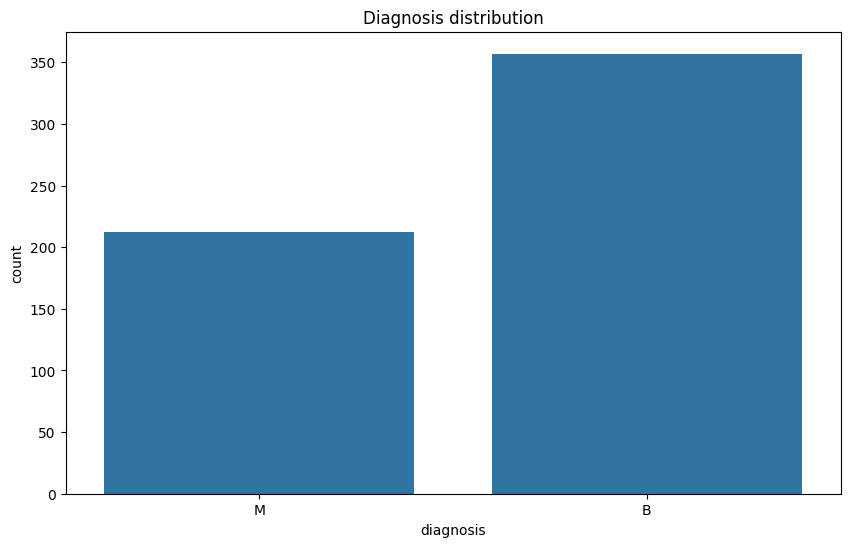


Numeric columns: 30


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
# EDA: diagnosis distribution and basic statistics

if 'diagnosis' in df_clean.columns:
    print(df_clean['diagnosis'].value_counts())
    sns.countplot(data=df_clean, x='diagnosis')
    plt.title('Diagnosis distribution')
    plt.show()
else:
    print("Column 'diagnosis' not found. Please check your dataset.")

# Show descriptive stats
numeric = df_clean.select_dtypes(include=[np.number])
print('\nNumeric columns:', len(numeric.columns))
if not numeric.empty:
    display(numeric.describe().T)

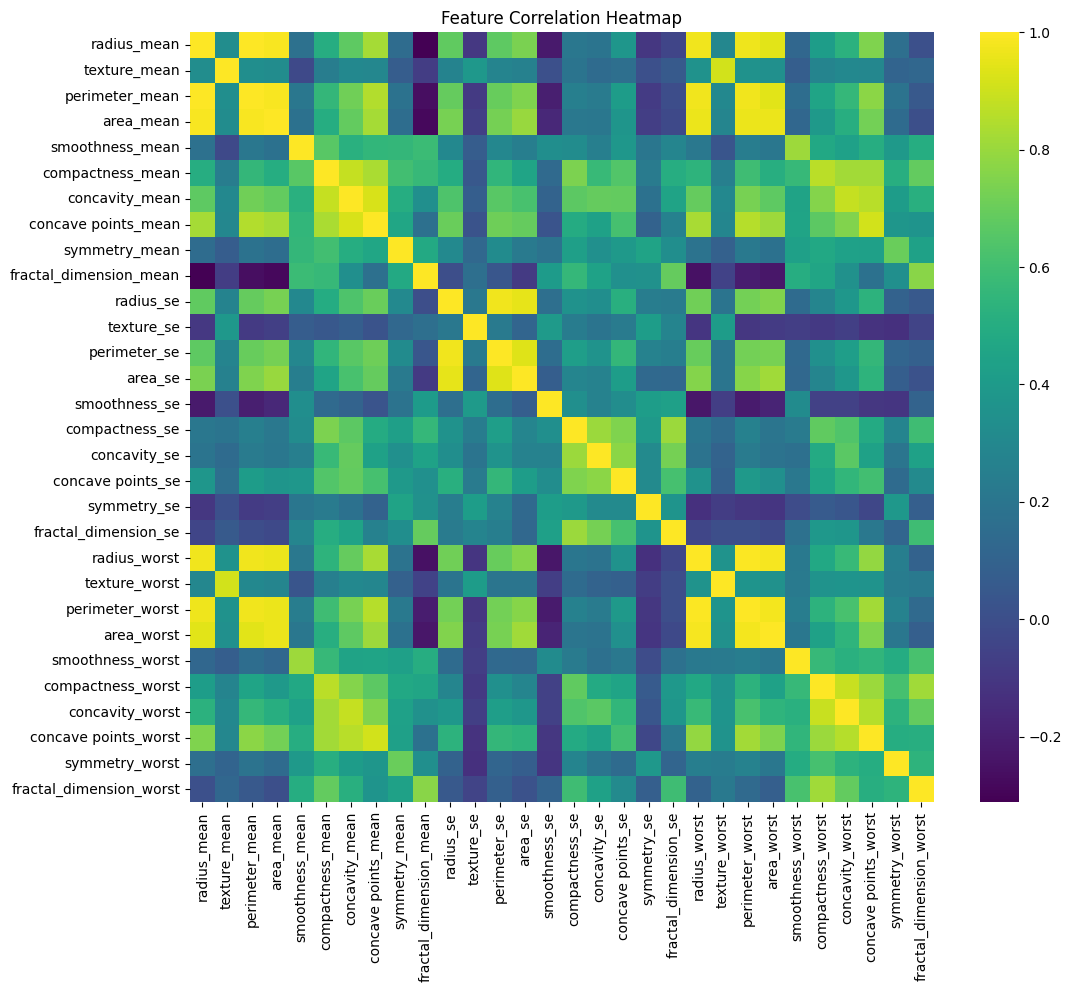

In [13]:
# Correlation heatmap of numeric features

if not numeric.empty:
    corr = numeric.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cmap='viridis', annot=False)
    plt.title('Feature Correlation Heatmap')
    plt.show()
else:
    print('No numeric columns to compute correlation.')

In [14]:
# Preprocessing: encode target, scale features, split dataset

# Encode target (M=Malignant, B=Benign) to 1/0 if needed
if 'diagnosis' in df_clean.columns:
    y = df_clean['diagnosis'].map({'M':1, 'B':0})
    if y.isnull().any():
        # try label encoding
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(df_clean['diagnosis'])
else:
    raise ValueError("Target column 'diagnosis' not found. Rename appropriate column to 'diagnosis'.")

# Features: drop target column and any non-numeric
X = df_clean.drop(columns=['diagnosis'])
X = X.select_dtypes(include=[np.number])

print('Features shape before scaling:', X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print('Train/Test shapes:', X_train.shape, X_test.shape)

Features shape before scaling: (569, 30)
Train/Test shapes: (455, 30) (114, 30)


In [15]:
# Train Random Forest Classifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {acc:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))

Accuracy on test set: 0.9737

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



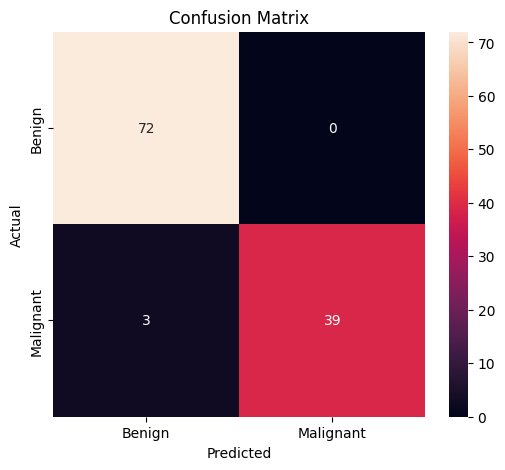


Top 15 feature importances:


area_worst              0.151412
concave points_worst    0.126497
radius_worst            0.093475
perimeter_worst         0.083642
concave points_mean     0.081082
perimeter_mean          0.077126
radius_mean             0.061990
concavity_mean          0.050818
area_mean               0.045916
concavity_worst         0.030022
area_se                 0.029064
compactness_worst       0.018005
texture_worst           0.016174
texture_mean            0.015545
smoothness_worst        0.015093
dtype: float64

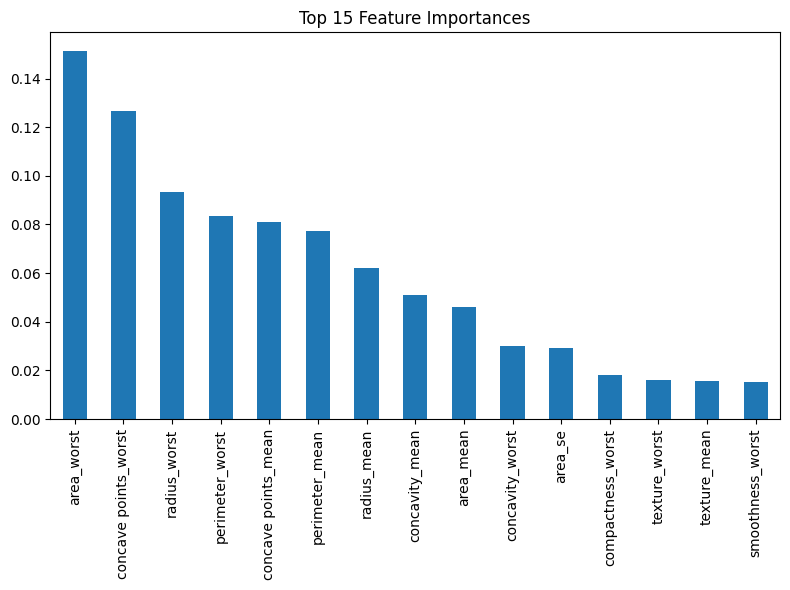

In [16]:
# Confusion matrix and feature importances

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importances (top 15)
importances = clf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
print('\nTop 15 feature importances:')
display(feat_imp.head(15))

plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()